In [14]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
wine_data = pd.read_csv("winequality-white.csv",delimiter=";",dtype=float)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


In [19]:
train_x,test_x,train_y,test_y = train_test_split(x_data,y_data,test_size = 0.3,random_state = 42)

log_reg=LogisticRegression()
log_reg.fit(train_x,train_y)

y_true,y_pred = test_y,log_reg.predict(test_x)
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1421
           1       0.00      0.00      0.00        49

    accuracy                           0.97      1470
   macro avg       0.48      0.50      0.49      1470
weighted avg       0.93      0.97      0.95      1470



C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
logit = sm.Logit(train_y,train_x).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.143100
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3417
Method:                           MLE   Df Model:                           10
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1179
Time:                        14:57:57   Log-Likelihood:                -490.55
converged:                       True   LL-Null:                       -556.12
Covariance Type:            nonrobust   LLR p-value:                 2.729e-23
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1153      0.138      0.835      0.404      -0.155       0.386
volatile acidity        -2.5585      1.092     -2.343      0.019      -4.699      -0.418
citric acid             -0.8329      0.941     -0.885      0.376      -2.678       1.012
residual sugar           0.0738      0.022      3.362      0.001       0.031       0.117
chlorides               -3.0146      7.500     -0.402      0.688     -17.714      11.684
free sulfur dioxide      0.0235      0.007      3.462      0.001       0.010       0.037
total sulfur dioxide    -0.0014      0.004     -0.411      0.681      -0.008       0.005
density                -16.2508      3.255     -4.992      0.000     -22.631      -9.871
pH                       0.6767      0.744      0.910      0.363      -0.781       2.134
sulphates                0.4109      0.713      0.577      0.564      -0.986       1.808
alcohol                  0.8842      0.098      8.987      0.000       0.691       1.077
========================================================================================
"""

C:\Users\Playdata\anaconda3\envs\env-da\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


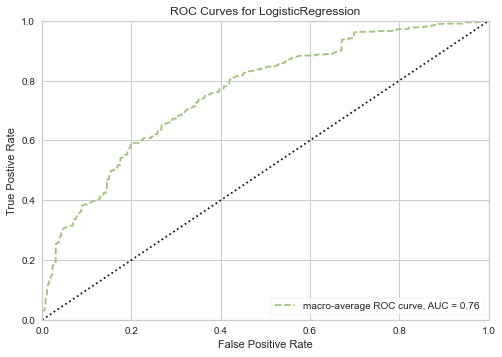

In [31]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(log_reg,classes = [0,1],micro = False, macro=True,per_class = False)
visualizer.fit(train_x,train_y)
visualizer.score(train_x,train_y)
visualizer.show()

LogisticRegression()